In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv('data/long_data.csv', usecols=['date', 'datatype', 'value'], parse_dates=['date'])[['date', 'datatype', 'value']]

In [3]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


In [6]:
wide_df.dtypes

date    datetime64[ns]
TMAX           float64
TMIN           float64
TOBS           float64
dtype: object

In [5]:
wide_df.describe(include='all')

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


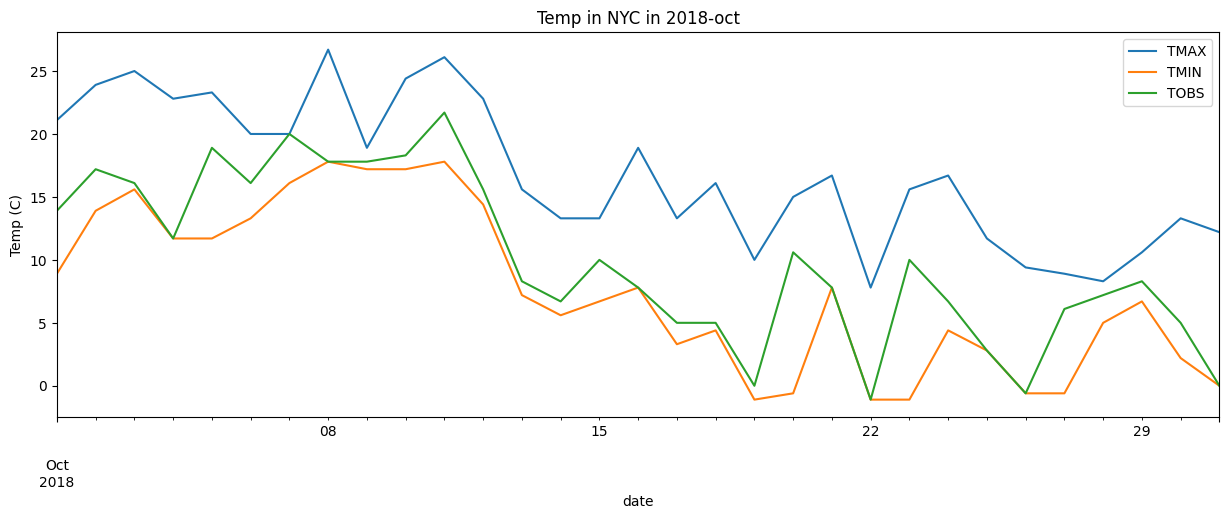

In [7]:
wide_df.plot(
    x='date',
    y=['TMAX', 'TMIN', 'TOBS'],
    figsize=(15,5),
    title='Temp in NYC in 2018-oct'
).set_ylabel('Temp (C)')
plt.show()

In [8]:
long_df.head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


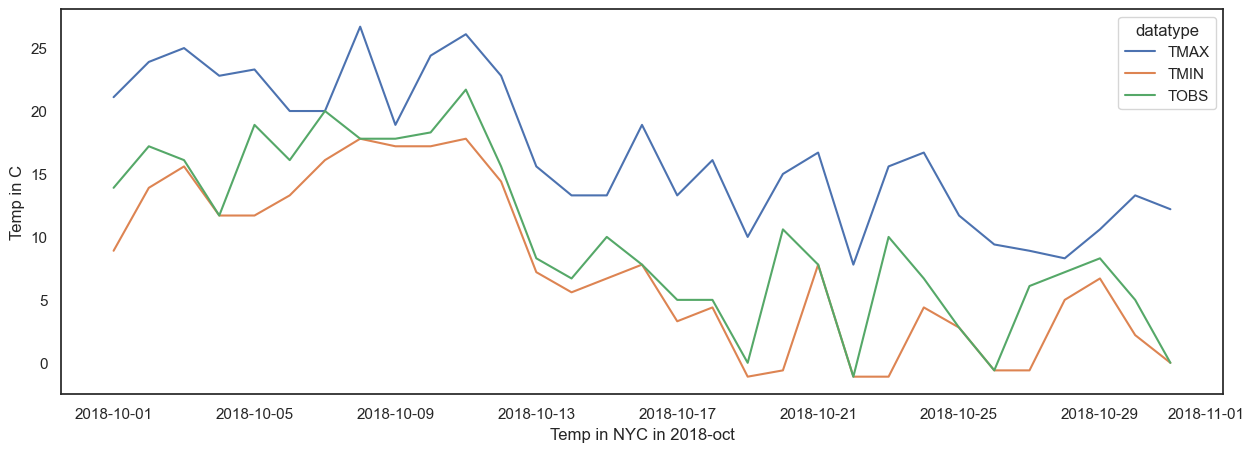

In [12]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(15,5)}, style='white')
ax = sns.lineplot(data=long_df, x='date', y='value', hue='datatype')
ax.set_ylabel('Temp in C')
ax.set_xlabel('Temp in NYC in 2018-oct')
plt.show()

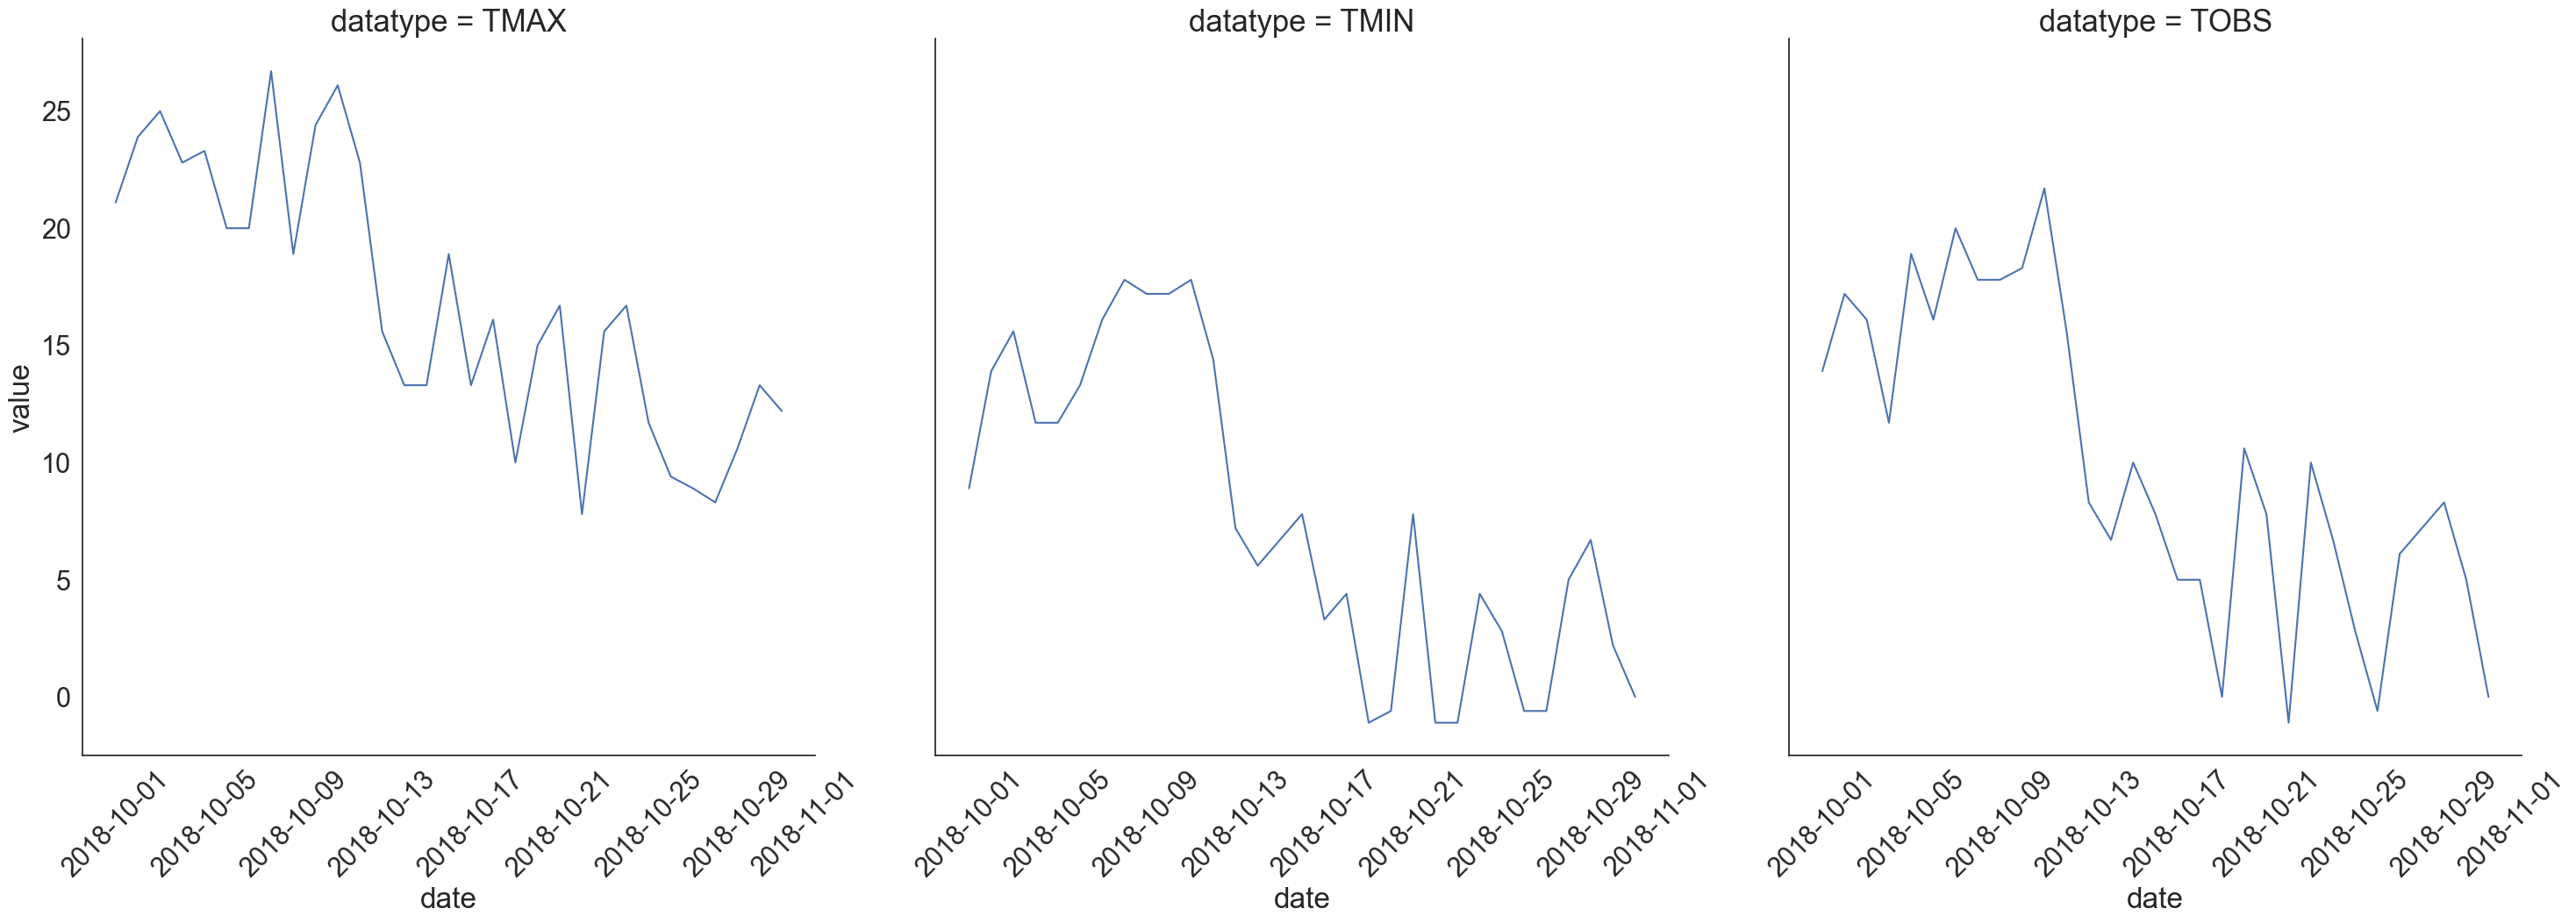

In [13]:
sns.set_theme(
    rc={'figure.figsize': (20, 10)},
    style='white',
    font_scale=2
)
g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()